# Cooperating rates

In [1]:
import evol_dynamics

In [2]:
import pandas as pd
import dask.dataframe as dd

import numpy as np
import tqdm
import itertools

In [3]:
import matplotlib.pyplot as plt
import matplotlib

cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples"), matplotlib.cm.get_cmap("Oranges")]

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [11]:
import glob

In [12]:
import matplotlib.colors as colors

In [13]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [14]:
matplotlib.rc('font', **font)

**Generate plot across axis**

In [15]:
Ss = [1.2, 0.8, 0.4, 0, -0.4, -0.8] # Ss = [2, 1.6, 1.2, 0.8, 0.4, 0, -0.4, -0.8, -1.2, -1.6, -2]
Ts = [0.2,  0.6,  1,  1.4,  1.8,  2.2]# Ts = [-1, -0.6, -0.2,  0.2,  0.6,  1,  1.4,  1.8,  2.2,  2.6,  3]

In [18]:
dimensions = 6

In [19]:
sorted_cvs_files_expected = [f"../matlab/data/expected/clean_S_{S}_T_{T}_beta_10.csv" for S in Ss for T in Ts]

In [20]:
cooperation_rates_expected = np.zeros((dimensions, dimensions))
scores_expected = np.zeros((dimensions, dimensions))

In [21]:
for i, file in enumerate(sorted_cvs_files_expected):
    x = int(i / dimensions)
    y = i % dimensions
    
    df = pd.read_csv(file)
    
    cooperation_rates_expected[int(x), int(y)] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    scores_expected[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

In [72]:
["w" if r > .6 else "black" for r in range(0, 2)]

['black', 'w']

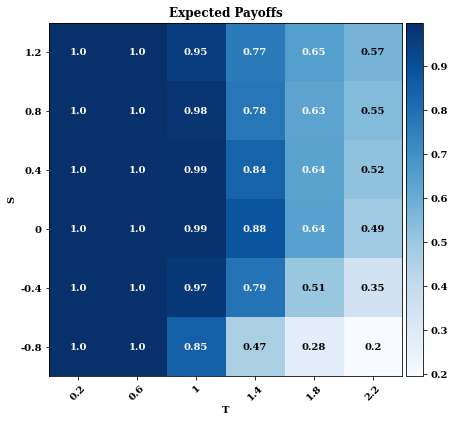

In [74]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_expected, cmap=cmaps[0])

axes.set_xticks(range(dimensions))
axes.set_yticks(range(dimensions))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

    
for k in range(dimensions):
    for j in range(dimensions):
        if round(cooperation_rates_expected[k, j], 2) >= .6:
            color = "w"
        else:
            color = "black"
        
        text = axes.text(j, k, round(cooperation_rates_expected[k, j], 2),
                       ha="center", va="center", color=color)
axes.set_title("Expected Payoffs", weight="bold");

fig.savefig("../static/expected_two_by_two_games_cooperation.pdf", bbox_inches='tight')

**Similar for stochastic payoffs**

In [75]:
sorted_cvs_files_stochastic = [f"../matlab/data/stochastic/clean_S_{S}_T_{T}_beta_10.csv" for S in Ss for T in Ts]

In [26]:
cooperation_rates_stoch = np.zeros((dimensions, dimensions))
scores_stoch = np.zeros((dimensions, dimensions))

In [27]:
for i, file in enumerate(sorted_cvs_files_stochastic):
    x = int(i / dimensions)
    y = i % dimensions
    
    df = dd.read_csv(file)
    
    cooperation_rates_stoch[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

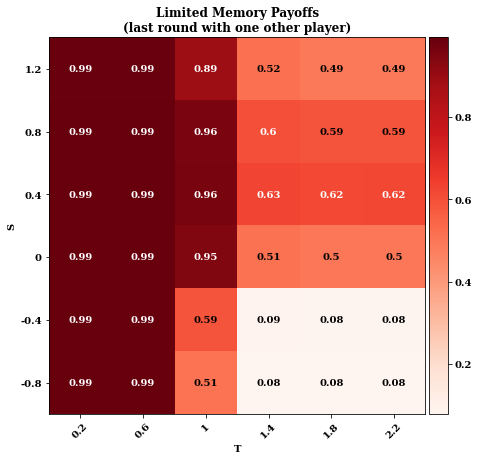

In [78]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_stoch, cmap=cmaps[1])

axes.set_xticks(range(dimensions))
axes.set_yticks(range(dimensions))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")


divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

for k in range(dimensions):
    for j in range(dimensions):
        if round(cooperation_rates_stoch[k, j], 2) >= .6:
            color = "w"
        else:
            color = "black"
            
        text = axes.text(j, k, round(cooperation_rates_stoch[k, j], 2),
                       ha="center", va="center", color=color)     

axes.set_title("Limited Memory Payoffs" "\n" "(last round with one other player)", weight="bold",);

plt.tight_layout();
fig.savefig("../static/stochastic_two_by_two_games_cooperation.pdf", bbox_inches='tight')

In [79]:
cooperation_difference =  cooperation_rates_expected - cooperation_rates_stoch

**Round Two**

In [33]:
sorted_cvs_files_rounds = [f"../matlab/data/round_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [34]:
cooperation_rates_rounds = np.zeros((dimensions, dimensions))

In [35]:
for i, file in enumerate(sorted_cvs_files_rounds):
    x = int(i / dimensions)
    y = i % dimensions
    
    df = pd.read_csv(file)
    
    cooperation_rates_rounds[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))

In [36]:
cooperation_rates_rounds = cooperation_rates_rounds / 2

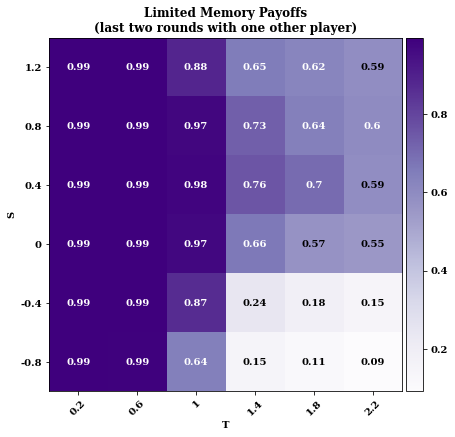

In [80]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_rounds, cmap=cmaps[3])

axes.set_xticks(range(dimensions))
axes.set_yticks(range(dimensions))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

for k in range(dimensions):
    for j in range(dimensions):
        if round(cooperation_rates_rounds[k, j], 2) >= .6:
            color = "w"
        else:
            color = "black"
        text = axes.text(j, k, round(cooperation_rates_rounds[k, j], 2),
                       ha="center", va="center", color=color)
        
        
axes.set_title("Limited Memory Payoffs" "\n" "(last two rounds with one other player)", weight="bold",);

fig.savefig("../static/rounds_two_by_two_games_cooperation.pdf", bbox_inches='tight')

In [81]:
rounds_difference = cooperation_rates_expected - cooperation_rates_rounds

**Opponents**

In [40]:
sorted_cvs_files_opponents = [f"../matlab/data/opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [42]:
cooperation_rates_opp = np.zeros((dimensions, dimensions))

In [43]:
for i, file in enumerate(sorted_cvs_files_opponents):
    x = int(i / dimensions)
    y = i % dimensions
    
    df = dd.read_csv(file)
    
    cooperation_rates_opp[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
#     scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

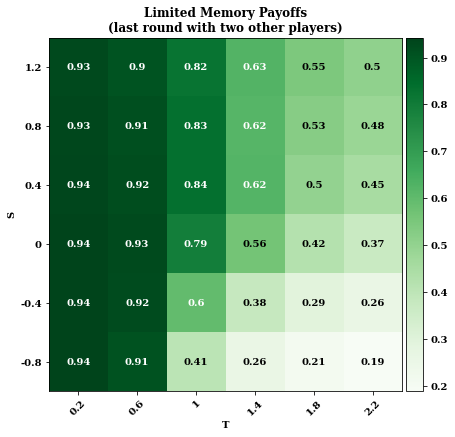

In [82]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_opp, cmap=cmaps[2])

axes.set_xticks(range(dimensions))
axes.set_yticks(range(dimensions))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');


for k in range(dimensions):
    for j in range(dimensions):
        if round(cooperation_rates_opp[k, j], 2) >= .6:
            color = "w"
        else:
            color = "black"
        text = axes.text(j, k, round(cooperation_rates_opp[k, j], 2),
                       ha="center", va="center", color=color)


axes.set_title("Limited Memory Payoffs" "\n" "(last round with two other players)", weight="bold",);

fig.savefig("../static/opponents_two_by_two_games_cooperation.pdf", bbox_inches='tight')

In [83]:
opponents_difference = cooperation_rates_expected - cooperation_rates_opp

**Rounds - opponents**

In [53]:
sorted_cvs_files_last = [f"../matlab/data/rounds_opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [54]:
cooperation_rates_last = np.zeros((dimensions, dimensions))

In [55]:
for i, file in enumerate(sorted_cvs_files_last):
    x = int(i / dimensions)
    y = i % dimensions
    
    df = dd.read_csv(file)
    
    cooperation_rates_last[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
#     scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

In [56]:
cooperation_rates_last = cooperation_rates_last / 2

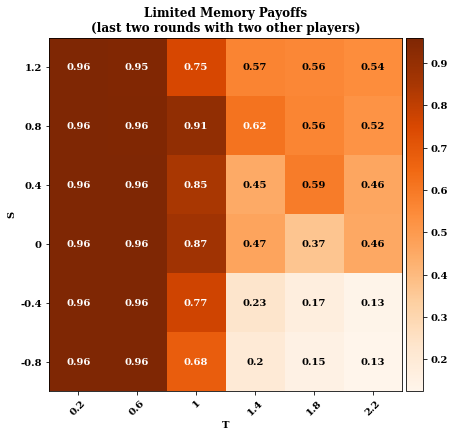

In [84]:
fig, axes = plt.subplots(figsize=(10, 6.5))

im = axes.imshow(cooperation_rates_last, cmap=cmaps[4])


axes.set_xticks(range(dimensions))
axes.set_yticks(range(dimensions))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

axes.set_xlabel('T', weight="bold")
axes.set_ylabel('S', weight="bold")

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');


for k in range(dimensions):
    for j in range(dimensions):
        if round(cooperation_rates_last[k, j], 2) >= .6:
            color = "w"
        else:
            color = "black"
        text = axes.text(j, k, round(cooperation_rates_last[k, j], 2),
                       ha="center", va="center", color=color)

axes.set_title("Limited Memory Payoffs" "\n" "(last two rounds with two other players)", weight="bold",);

fig.savefig("../static/rounds_opponents_two_by_two_games_cooperation.pdf", bbox_inches='tight')

In [85]:
rounds_opp_difference = cooperation_rates_expected - cooperation_rates_last

**Differences**

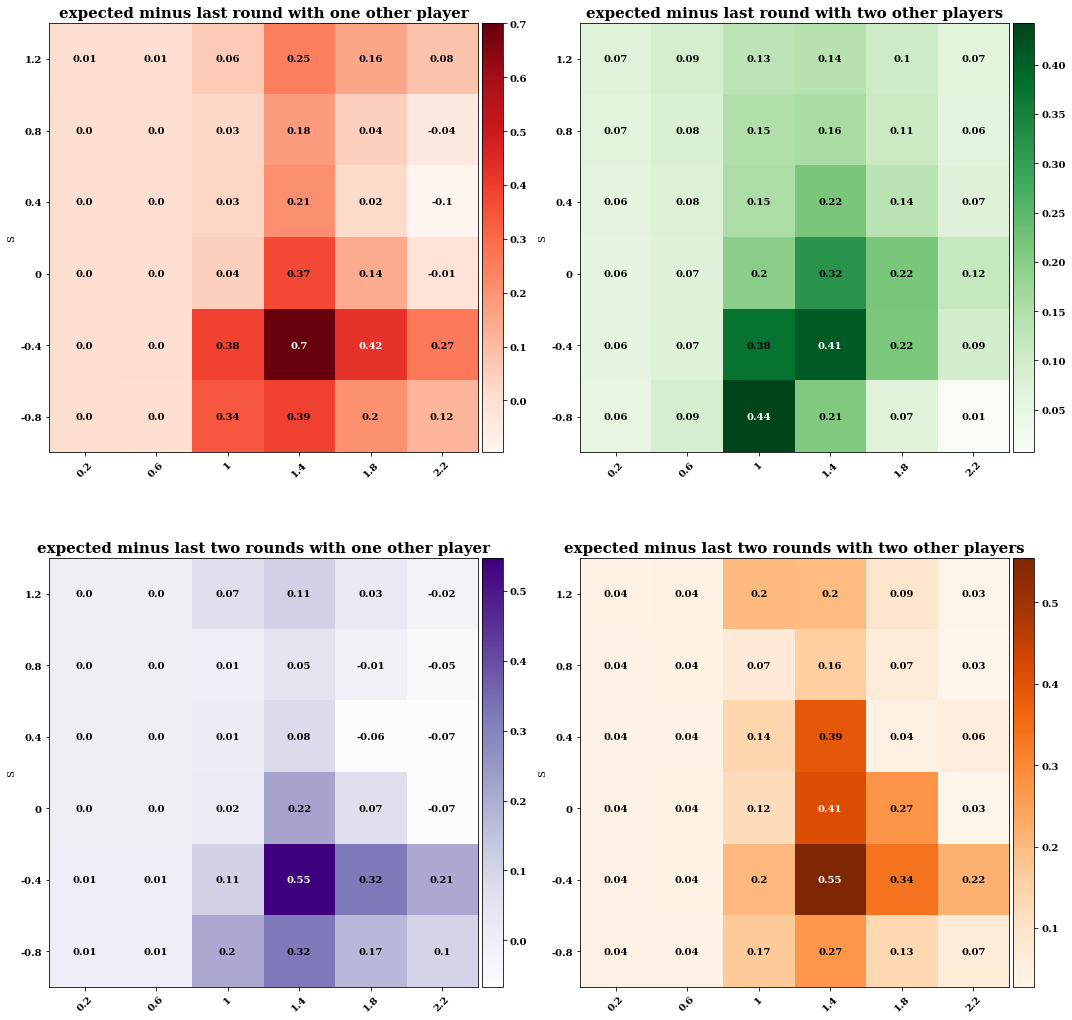

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for i, rates in enumerate([cooperation_difference, 
                           opponents_difference,
                           rounds_difference, 
                           rounds_opp_difference]):
    
    index = (int(i / 2), i % 2)

    im = axes[index].imshow(rates, cmap=cmaps[i + 1])

    axes[index].set_xticks(range(dimensions))
    axes[index].set_yticks(range(dimensions))

    axes[index].set_xticklabels(Ts, rotation=45)
    axes[index].set_yticklabels(Ss)
    
    axes[index].set_ylabel('T')
    axes[index].set_ylabel('S')

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical');

    for k in range(dimensions):
        for j in range(dimensions):
            if round(rates[k, j], 2) >= .4:
                color = "w"
            else:
                color = "black"
            text = axes[index].text(j, k, round(rates[k, j], 2),
                               ha="center", va="center", color=color)

axes[0, 0].set_title("expected minus last round with one other player", weight="bold", fontsize=15);
axes[0, 1].set_title("expected minus last round with two other players", weight="bold", fontsize=15);
axes[1, 0].set_title("expected minus last two rounds with one other player", weight="bold", fontsize=15);
axes[1, 1].set_title("expected minus last two rounds with two other players", weight="bold", fontsize=15);
plt.tight_layout()

fig.savefig("../static/difference_in_cooperation.pdf", bbox_inches='tight')